In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\MY Laptop\Desktop\guvi_class\smart premium\train.csv")

In [2]:
z = (df['Annual Income']-df['Annual Income'].mean())/df['Annual Income'].std()
df['z score'] = z
df = df[(df['z score']<=3) & (df['z score']>=-3)]
df.drop('z score', axis=1, inplace=True)

df['Marital Status'] = df[['Marital Status']].fillna(df['Marital Status'].mode()[0])
df['Age'] = df[['Age']].fillna(df['Age'].median())
df['Number of Dependents'] = df[['Number of Dependents']].fillna(df['Number of Dependents'].median())
df['Previous Claims'] = df[['Previous Claims']].fillna(df['Previous Claims'].median())
df['Occupation'] = df[['Occupation']].fillna(df['Occupation'].mode()[0])
df['Health Score'] = df[['Health Score']].fillna(df['Health Score'].median())
df['Credit Score'] = df[['Credit Score']].fillna(df['Credit Score'].median())
df['Customer Feedback'] = df[['Customer Feedback']].fillna(df['Customer Feedback'].mode()[0])
df['Vehicle Age'] = df[['Vehicle Age']].fillna(df['Vehicle Age'].median())
df['Insurance Duration'] = df[['Insurance Duration']].fillna(df['Insurance Duration'].median())




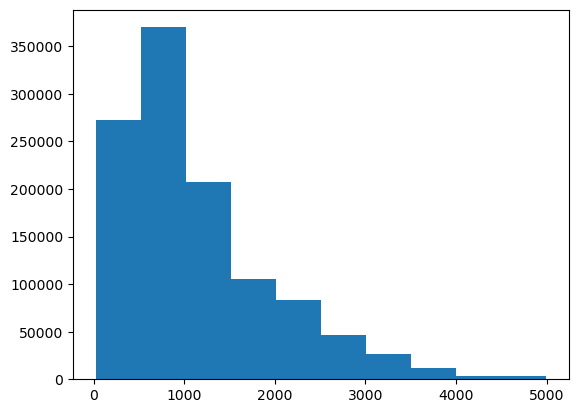

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(df['Premium Amount'])
plt.show()

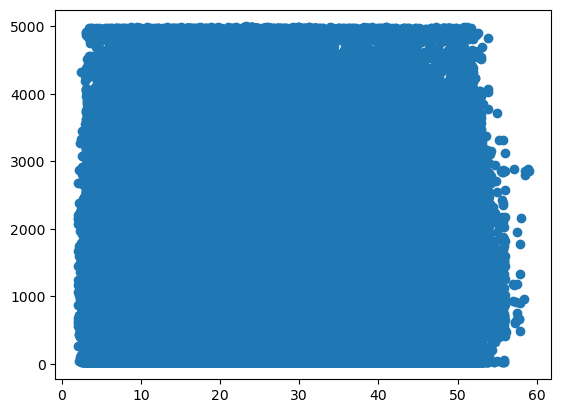

In [5]:
import seaborn as sns
premiumamt=df['Premium Amount'].values
income=df['Health Score'].values
plt.scatter(income,premiumamt)

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


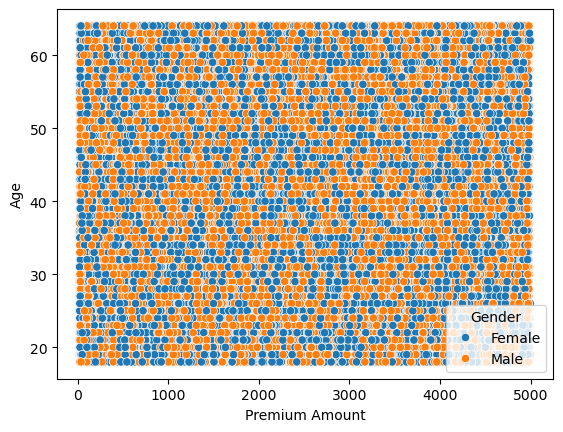

In [6]:
sns.scatterplot(data=df,x="Premium Amount",y='Age',hue='Gender')
plt.show()

In [3]:


df['Gender']=df['Gender'].replace({'Female':0,'Male':1})
df['Smoking Status']=df['Smoking Status'].replace({'No':0,'Yes':1})
df=pd.get_dummies(df,columns=['Property Type',
'Marital Status',
'Education Level',
'Occupation',
'Location',
'Policy Type',
'Customer Feedback',
'Exercise Frequency'],
dtype='int')
df.drop(['Policy Start Date'],axis=1,inplace=True)

C:\Users\MY Laptop\AppData\Local\Temp\ipykernel_9968\278662151.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace({'Female':0,'Male':1})
C:\Users\MY Laptop\AppData\Local\Temp\ipykernel_9968\278662151.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Smoking Status']=df['Smoking Status'].replace({'No':0,'Yes':1})


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import xgboost as xgb

X=df.drop(['Premium Amount'],axis=1)
# X.isna().sum()
y=df['Premium Amount']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
models = [LinearRegression(),DecisionTreeRegressor(),xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=10),RandomForestRegressor(n_estimators=100,max_depth=10,n_jobs=-1)]

for model in models:
    model.fit(x_train,y_train)
    train_pred=model.predict(x_train)
    test_pred=model.predict(x_test)
    print(f"****{type(model).__name__}*******")
    print(f"MSE for Training Data : {mean_squared_error(y_train,train_pred)}")
    print(f"MSE for Test data: {mean_squared_error(y_test,test_pred)}")

    print(f"R2 score for train data: {r2_score(y_train,train_pred)}")
    print(f"R2 score for test data: {r2_score(y_test,test_pred)}")


****XGBRegressor*******
MSE for Training Data : 634250.0926755233
MSE for Test data: 704541.6338613603
R2 score for train data: 0.12632834231566226
R2 score for test data: 0.03230854837490105
****RandomForestRegressor*******
MSE for Training Data : 690138.5963559981
MSE for Test data: 700809.8987896069
R2 score for train data: 0.04934261977514098
R2 score for test data: 0.03743410512713108
